# Tugas 1 Pengolahan Citra Digital
- Nama : Rachel Naragifta
- NIM  : 21/482074/PA/21018

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Image in black and white

In [33]:
image = cv.imread('/content/drive/MyDrive/PCD_Assignment/Wallpaper-Windows-XP.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
flat_image = image.ravel()

## Image Histogram

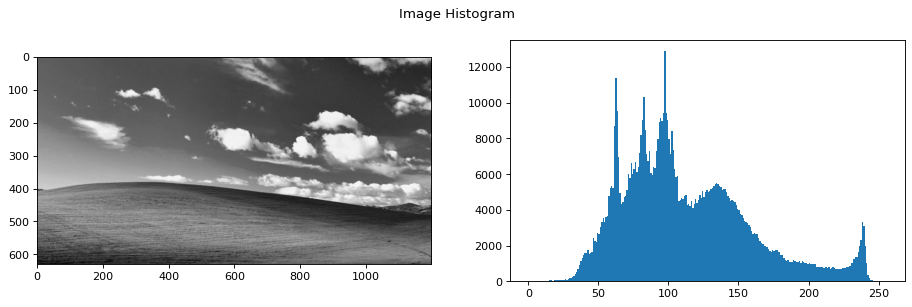

In [34]:
def show_image_info(image, title):
  fig = plt.figure(figsize=(14, 4), dpi=80)
  fig.suptitle(title)
  
  im_sp = fig.add_subplot(121)
  hist_sp = fig.add_subplot(122)
  im_sp.imshow(image, cmap='gray')
  hist_sp.hist(image.ravel(), 256, [0, 256])

  plt.show()

show_image_info(image, 'Image Histogram')

## Non-Uniform Quantization menurut Max-Lloyd Algorithm

In [35]:
init_levels = [(0, 63), (64, 127), (128, 191), (192, 255)]

In [36]:
def calc_mse(start, end):                                                        # Fungsi untuk menghitung MSE
  points = flat_image[(flat_image >= start) & (flat_image <= end)]
  if len(points) == 0:
    return 0
  level_mean = points.mean()
  errors = points - level_mean
  return np.square(errors).mean()

def split_level(levels):                                                         # Fungsi untuk membagi level-level yang sudah diinisialisasikan menjadi lebih kecil
  for i, level in enumerate(levels):
    start, end = level
    if calc_mse(start, end) > 0:
      mid = int((end - start) / 2 + start)
      levels[i] = (start, mid)
      levels.insert(i + 1, (mid + 1, end))
      break

def quantize_to_n(n):                                                            # Fungsi untuk mengkuantisasi gambar menjadi sejumlah level yang diinginkan
  levels = init_levels.copy()
  while len(levels) < n:
    split_level(levels)
  return levels

def reconstruct_image(levels):                                                   # Fungsi untuk menyusun kembali hasil kuantisasi menjadi susunan array image yang baru
  trans_table = {}
  for point in set(flat_image):
    for start, end in levels:
      if start <= point <= end:
        level_mean = int(flat_image[(flat_image >= start) & \
                                    (flat_image <= end)].mean())
        trans_table[point] = level_mean
  
  def make_trans(key):
    return trans_table[key]
  
  return np.vectorize(make_trans)(image)

In [37]:
# 4 level
quantized_image_level_4 = reconstruct_image(quantize_to_n(4))
# 50 level
quantized_image_level_50 = reconstruct_image(quantize_to_n(50))
# 100 level
quantized_image_level_100 = reconstruct_image(quantize_to_n(100))

## Non- Quantized dan Quantized

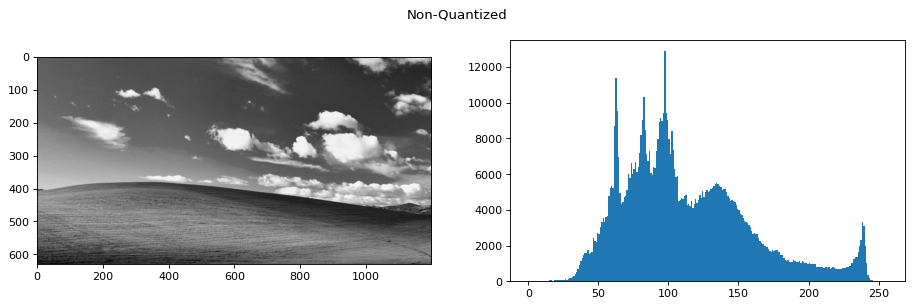

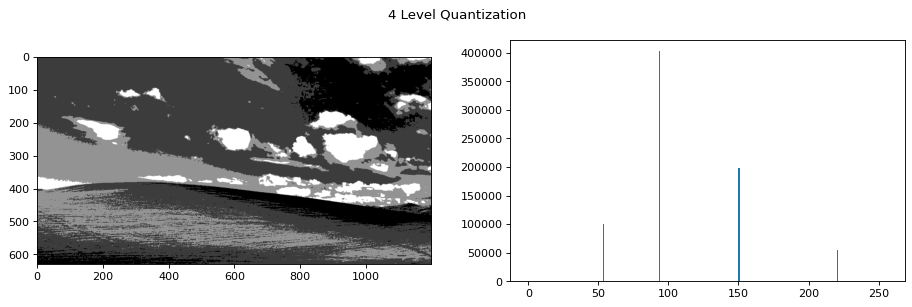

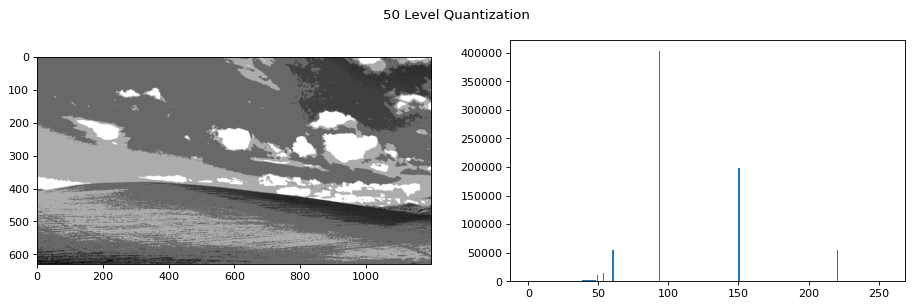

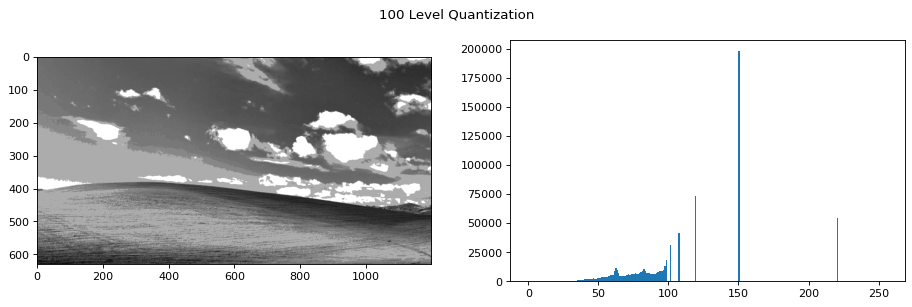

In [38]:
show_image_info(image, 'Non-Quantized')
show_image_info(quantized_image_level_4, '4 Level Quantization')
show_image_info(quantized_image_level_50, '50 Level Quantization')
show_image_info(quantized_image_level_100, '100 Level Quantization')

### Kesimpulan
> Dari gambar yang diperoleh, terlihat bahwa hasil image yang sudah dikuantisasi terlihat memiliki kontras yang cukup berbeda dibandingkan yang belum. Semakin tinggi level kuantisasinya, semakin banyak detail yang bisa ditangkap.